## Team 3:
    Goldie
    Matthew
    Hanna

In [2]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import statsmodels.api as sm

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Data overview
print("Train:", train.shape, "\nTest:", test.shape)
train.info()

Train: (2001, 81) 
Test: (929, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 81 columns):
Id                 2001 non-null int64
MS SubClass        2001 non-null int64
MS Zoning          2001 non-null object
Lot Frontage       1669 non-null float64
Lot Area           2001 non-null int64
Street             2001 non-null object
Alley              129 non-null object
Lot Shape          2001 non-null object
Land Contour       2001 non-null object
Utilities          2001 non-null object
Lot Config         2001 non-null object
Land Slope         2001 non-null object
Neighborhood       2001 non-null object
Condition 1        2001 non-null object
Condition 2        2001 non-null object
Bldg Type          2001 non-null object
House Style        2001 non-null object
Overall Qual       2001 non-null int64
Overall Cond       2001 non-null int64
Year Built         2001 non-null int64
Year Remod/Add     2001 non-null int64
Roof Style         2001 n

## Handling Numeric Variables

In [5]:
# Get the numeric variables only
train_num = train._get_numeric_data().drop(['SalePrice'],axis=1)

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


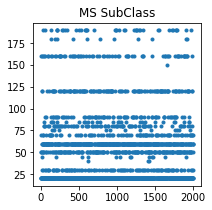

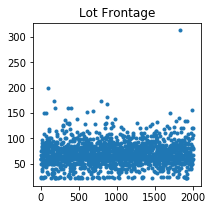

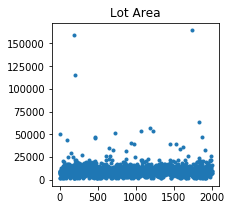

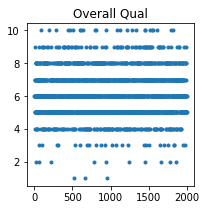

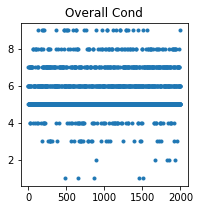

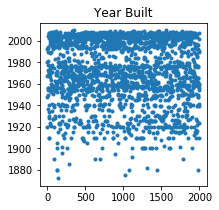

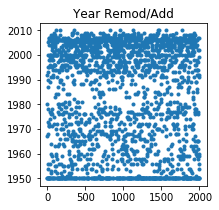

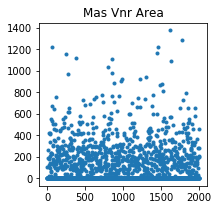

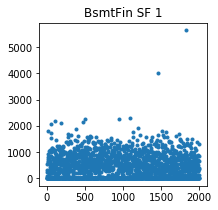

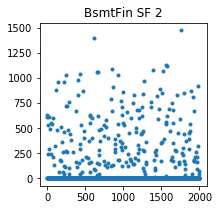

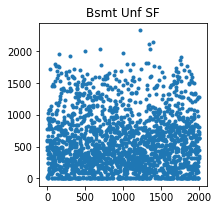

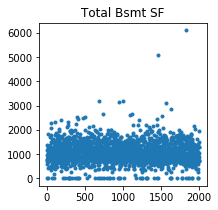

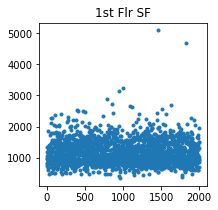

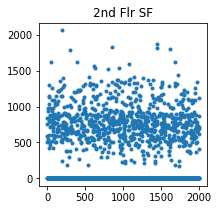

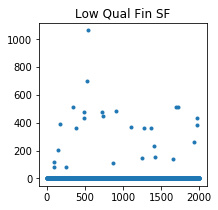

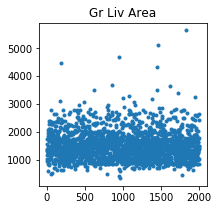

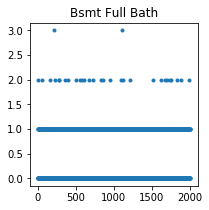

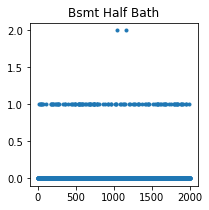

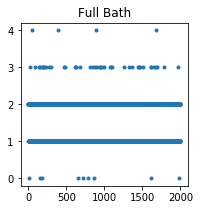

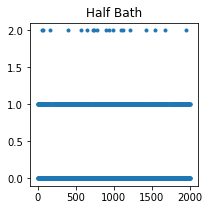

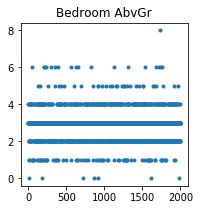

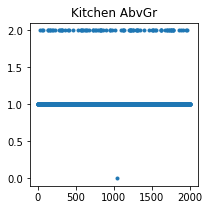

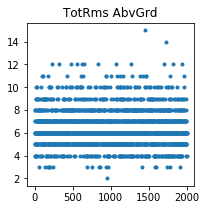

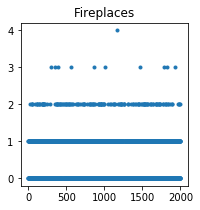

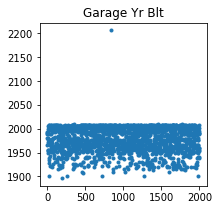

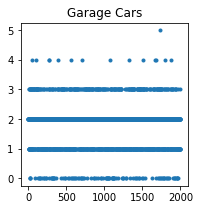

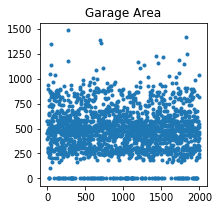

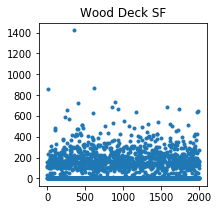

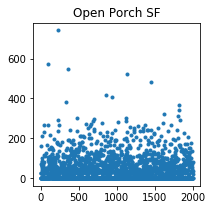

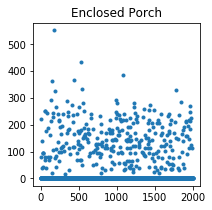

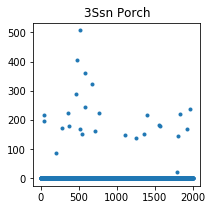

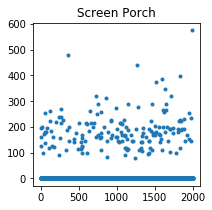

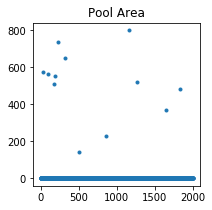

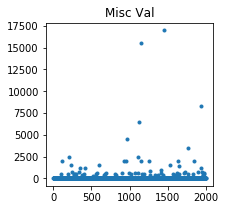

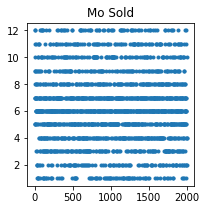

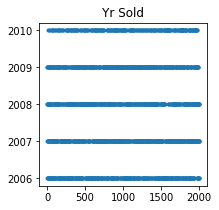

In [6]:
# Plot the numeric variables:
for col in train_num.drop(['Id'], axis=1).columns:
    plt.figure(figsize=(3,3))
    plt.plot(train_num[col],'.')
    plt.title(col)
plt.show()

In [8]:
train_num.isnull().sum()

Id                   0
MS SubClass          0
Lot Frontage       332
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        16
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      106
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [9]:
# Drop the variables that have more than 100 missing values
train_num_2 = train_num.drop(['Lot Frontage', 'Garage Yr Blt'],axis=1)
test_num = test[train_num_2.columns]

In [10]:
print(train_num_2.shape, test_num.shape)

(2001, 35) (929, 35)


In [11]:
# Concatenate the train and test data
data  = pd.concat([train_num_2,test_num],axis=0)

In [12]:
data.shape

(2930, 35)

In [13]:
# Impute the NAs with median
data_2 = data.fillna(data.median())

In [14]:
# Separate the train and test data
num_train = data_2.iloc[0:len(train),]
num_test = data_2.iloc[len(train):,]

## Handling outliers

C:\Users\Hanna\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<function matplotlib.pyplot.show(*args, **kw)>

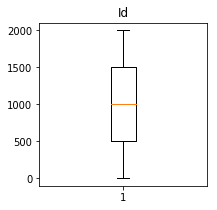

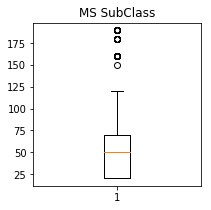

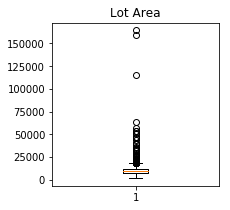

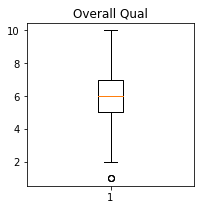

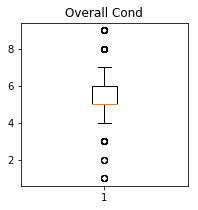

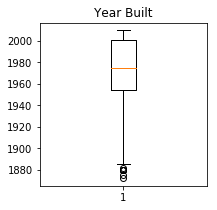

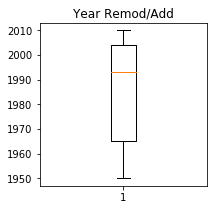

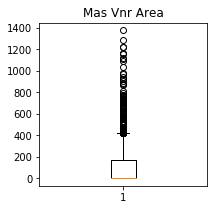

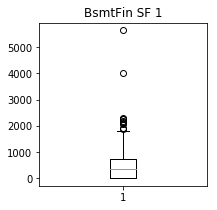

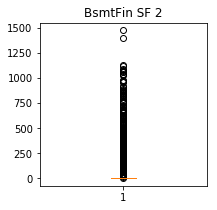

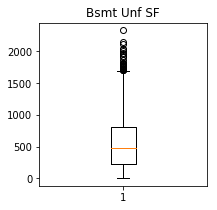

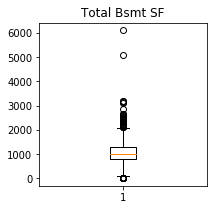

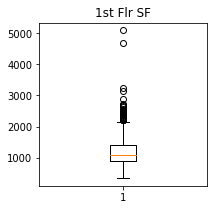

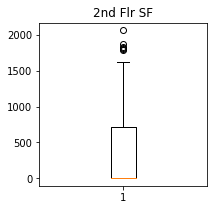

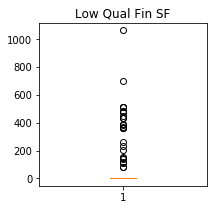

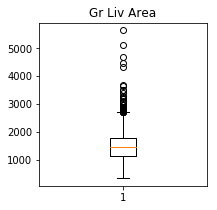

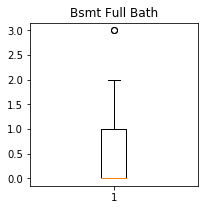

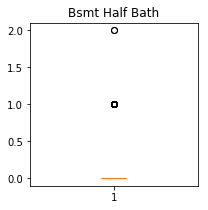

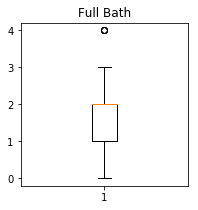

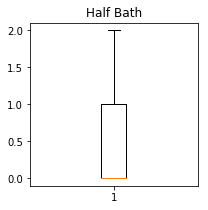

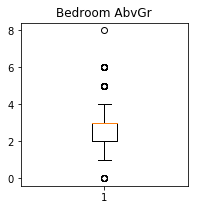

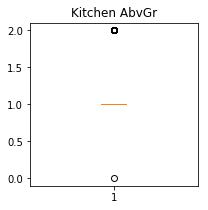

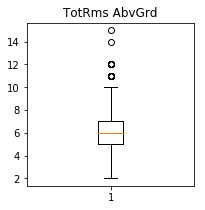

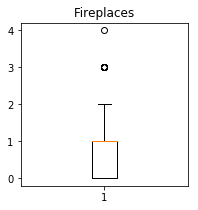

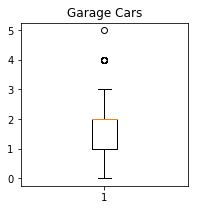

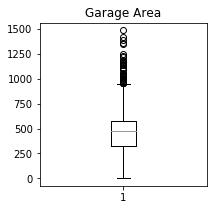

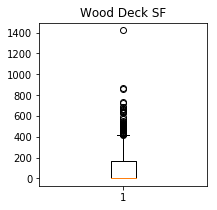

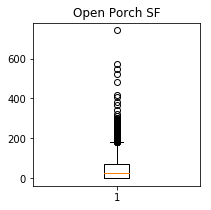

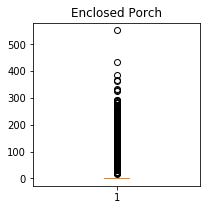

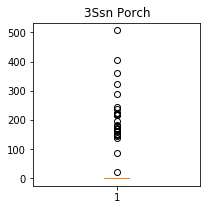

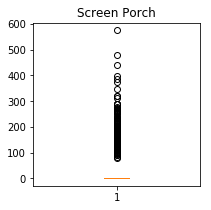

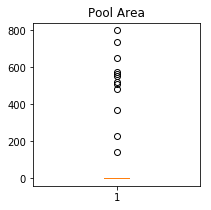

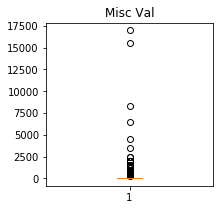

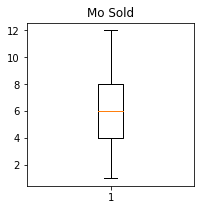

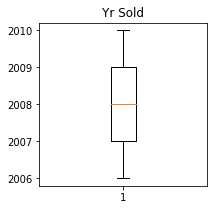

In [15]:
# Plot the numeric variables 
for col in num_train.columns:
    plt.figure(figsize=(3,3))
    plt.boxplot(num_train[col]) 
    plt.title(col)
plt.show()

# There are outliers in the data

In [16]:
# Check the minimum and maximum of each collumn
num_train.drop(['Id'],axis=1).agg([np.min, np.max])

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
amin,20,1470,1,1,1872,1950,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,1,2006
amax,190,164660,10,9,2010,2010,1378.0,5644.0,1474.0,2336.0,...,1488.0,1424,742,552,508,576,800,17000,12,2010


In [17]:
# Remove outliers
# Some varialbes do not have outliers in terms of what they represent, so we do not need to remove their statistical outliers
cols = set(num_train.columns) - set(['Id','Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add','Mo Sold'])
col = [x for x in cols]
num_train_clean = num_train[(np.abs(stats.zscore(num_train[col])) < 3).all(axis=1)]

In [18]:
num_train_clean.shape

(1436, 35)

In [19]:
train['SalePrice'][num_train_clean.index].shape

(1436,)

## Handling multi-collinarity

Text(0.5,1,'Correlation Matrix')

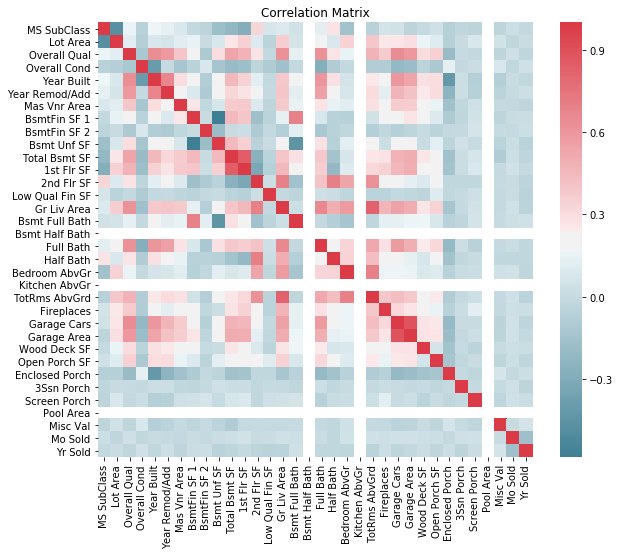

In [20]:
# Plot the correlation matrix of the numeric variables 

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = num_train_clean.drop(['Id'],axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
ax.set_title('Correlation Matrix')

# The correlation matrix shows that some variables are correlated to each other

In [21]:
# Check the corrleation between each numeric variable and 'SalePrice' 
correlation = []

for col in num_train_clean.drop(['Id'],axis=1).columns:
    correlation.append([col, round(np.corrcoef(num_train_clean[col], train['SalePrice'][num_train_clean.index])[0,1],2)])
sorted(correlation, key=lambda x: x[1])

C:\Users\Hanna\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Hanna\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[['Enclosed Porch', -0.2],
 ['Overall Cond', -0.15],
 ['BsmtFin SF 2', -0.08],
 ['Low Qual Fin SF', -0.05],
 ['Yr Sold', -0.05],
 ['Misc Val', -0.04],
 ['3Ssn Porch', -0.0],
 ['MS SubClass', 0.01],
 ['Screen Porch', 0.05],
 ['Mo Sold', 0.05],
 ['Bsmt Unf SF', 0.21],
 ['Bsmt Full Bath', 0.26],
 ['Bedroom AbvGr', 0.26],
 ['Half Bath', 0.3],
 ['2nd Flr SF', 0.32],
 ['Lot Area', 0.35],
 ['Wood Deck SF', 0.36],
 ['Open Porch SF', 0.37],
 ['BsmtFin SF 1', 0.38],
 ['Fireplaces', 0.45],
 ['Mas Vnr Area', 0.47],
 ['Year Remod/Add', 0.57],
 ['1st Flr SF', 0.61],
 ['TotRms AbvGrd', 0.61],
 ['Year Built', 0.63],
 ['Total Bsmt SF', 0.64],
 ['Full Bath', 0.64],
 ['Garage Area', 0.68],
 ['Garage Cars', 0.7],
 ['Gr Liv Area', 0.77],
 ['Overall Qual', 0.82],
 ['Bsmt Half Bath', nan],
 ['Kitchen AbvGr', nan],
 ['Pool Area', nan]]

In [22]:
def calculate_vif(r_squared):
    if r_squared >= 0.99:# to avoid devision by 0
        vif = "NA"
    else:
        vif = 1/(1-r_squared)
    return vif

In [23]:
def generate_vif_dataframe(processed_train):
    r2 = []
    vif = []
    v_name = []
    
    for i in range(processed_train.shape[1]): 
        X = processed_train.drop(processed_train.columns[i], axis=1)
        y = processed_train.iloc[:,i]
        results = LinearRegression().fit(X,y)
        r2_i = results.score(X,y) # calculate r_squared
        r2.append(r2_i)
        vif.append(calculate_vif(r2_i)) # calculate VIF
        v_name.append(processed_train.columns[i])
        
    vif_dataframe = pd.DataFrame(list(zip(v_name, vif)), columns =['Variable Name', 'VIF']) 
    return vif_dataframe

In [24]:
generate_vif_dataframe(num_train_clean)

,Variable Name,VIF
0,Id,1.023
1,MS SubClass,1.95531
2,Lot Area,1.8054
3,Overall Qual,3.28659
4,Overall Cond,1.60703
5,Year Built,4.68104
6,Year Remod/Add,2.63546
7,Mas Vnr Area,1.37904
8,BsmtFin SF 1,NA
9,BsmtFin SF 2,NA


In [25]:
# Drop the variables with "NA" values, which means super high multi-correlation
generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.9518
1,Lot Area,1.803
2,Overall Qual,3.27997
3,Overall Cond,1.60131
4,Year Built,4.6559
5,Year Remod/Add,2.62964
6,Mas Vnr Area,1.37896
7,BsmtFin SF 2,1.07759
8,Bsmt Unf SF,2.51959
9,Total Bsmt SF,5.54111


In [26]:
# Drop the variables with "NA" values, which means super high multi-correlation
generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.9518
1,Lot Area,1.803
2,Overall Qual,3.27997
3,Overall Cond,1.60131
4,Year Built,4.6559
5,Year Remod/Add,2.62964
6,Mas Vnr Area,1.37896
7,BsmtFin SF 2,1.07759
8,Bsmt Unf SF,2.51959
9,Total Bsmt SF,5.54111


In [27]:
# Drop the variables with "NA" values, which means super high multi-correlation
generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF','Bsmt Half Bath'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.9518
1,Lot Area,1.803
2,Overall Qual,3.27997
3,Overall Cond,1.60131
4,Year Built,4.6559
5,Year Remod/Add,2.62964
6,Mas Vnr Area,1.37896
7,BsmtFin SF 2,1.07759
8,Bsmt Unf SF,2.51959
9,Total Bsmt SF,5.54111


In [28]:
# Drop the variables with "NA" values, which means super high multi-correlation
generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF','Bsmt Half Bath','Kitchen AbvGr'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.9518
1,Lot Area,1.803
2,Overall Qual,3.27997
3,Overall Cond,1.60131
4,Year Built,4.6559
5,Year Remod/Add,2.62964
6,Mas Vnr Area,1.37896
7,BsmtFin SF 2,1.07759
8,Bsmt Unf SF,2.51959
9,Total Bsmt SF,5.54111


In [29]:
# Drop the variables with "NA" values, which means super high multi-correlation
generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF','Bsmt Half Bath','Kitchen AbvGr',
                                            'Pool Area'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.951804
1,Lot Area,1.802998
2,Overall Qual,3.279967
3,Overall Cond,1.601308
4,Year Built,4.655895
5,Year Remod/Add,2.629644
6,Mas Vnr Area,1.378964
7,BsmtFin SF 2,1.077590
8,Bsmt Unf SF,2.519594
9,Total Bsmt SF,5.541114


In [30]:
# Drop the variables with high VIF

generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF','Bsmt Half Bath','Kitchen AbvGr',
                                            'Pool Area','2nd Flr SF'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.890487
1,Lot Area,1.791067
2,Overall Qual,3.276931
3,Overall Cond,1.596462
4,Year Built,4.654383
5,Year Remod/Add,2.619773
6,Mas Vnr Area,1.361425
7,BsmtFin SF 2,1.075630
8,Bsmt Unf SF,2.511285
9,Total Bsmt SF,3.470285


In [31]:
# Drop the variables with high VIF
generate_vif_dataframe(num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF','Bsmt Half Bath','Kitchen AbvGr',
                                            'Pool Area','2nd Flr SF','Garage Cars'], axis=1))

,Variable Name,VIF
0,MS SubClass,1.884024
1,Lot Area,1.789441
2,Overall Qual,3.257213
3,Overall Cond,1.596290
4,Year Built,4.628034
5,Year Remod/Add,2.618990
6,Mas Vnr Area,1.359412
7,BsmtFin SF 2,1.074755
8,Bsmt Unf SF,2.505780
9,Total Bsmt SF,3.463409


In [32]:
# Since "Gr Liv Area" has a very storng correlation with SalePrice, we will keep it in the model
# Applying CPA on these variables to make the predictors independent and then concatenate with the categorical variables
# The resulting RMSE and R2 are very similar to those from the model with these original variables
# So we will use the original variables to keep the model relatively simple
X_num = num_train_clean.drop(['Id','BsmtFin SF 1','1st Flr SF','Bsmt Half Bath','Kitchen AbvGr',
                                            'Pool Area','2nd Flr SF','Garage Cars'], axis=1)

In [33]:
### Add a new variable
# Since 'Overall Qual' has the strongest correlation with SalePrice, and 'Overall Qual' is an ordinal variable
# The true distance in terms of SalePrice between each level of 'Overall Qual' may be different
# Therefore, we add the square of this variable in the model
X_num['Overall_Qual_2'] = [x**2 for x in X_num['Overall Qual']]

## Handling Categorical Variables:

In [34]:
# Concatenate the train and test data
df  = pd.concat([train.drop(['SalePrice'],axis=1),test],axis=0)

In [35]:
# Get Categorical data:
num = df._get_numeric_data().columns
cat = list(set(df.columns) - set(num))
df_cat = df[cat]

In [36]:
df_cat.isnull().sum()

Bsmt Cond           80
Sale Condition       0
Bldg Type            0
Functional           0
Exterior 2nd         0
Roof Matl            0
Sale Type            0
Exter Cond           0
Bsmt Exposure       83
Utilities            0
Garage Qual        159
BsmtFin Type 2      81
Street               0
Lot Shape            0
Condition 2          0
Land Slope           0
Condition 1          0
Neighborhood         0
Exter Qual           0
Bsmt Qual           80
Land Contour         0
House Style          0
Exterior 1st         0
Garage Finish      159
Garage Cond        159
Heating QC           0
Fireplace Qu      1422
MS Zoning            0
Kitchen Qual         0
Pool QC           2917
Alley             2732
BsmtFin Type 1      80
Foundation           0
Central Air          0
Lot Config           0
Electrical           1
Roof Style           0
Paved Drive          0
Heating              0
Fence             2358
Misc Feature      2824
Mas Vnr Type        23
Garage Type        157
dtype: int6

In [37]:
# Drop the columns that have more than 5% missing values
df_cat1 = df_cat.dropna(thresh=0.95*df.shape[0], axis=1)

print("Columns dropped:", set(df_cat.columns)-set(df_cat1.columns))

Columns dropped: {'Garage Finish', 'Garage Cond', 'Garage Qual', 'Fireplace Qu', 'Pool QC', 'Alley', 'Fence', 'Misc Feature', 'Garage Type'}


In [38]:
# Drop the columns that don't have much variation (more than 80% of the observations have the same value)
flag = []
for col in df_cat1.columns:
    top_freq = df_cat1[col].value_counts().iloc[0]
    flag.append(top_freq>=len(df_cat1)*0.80)
df_cat2 = df_cat1.drop(df_cat1.columns[flag], axis=1) 

print("Columns dropped:", set(df_cat1.columns) - set(df_cat2.columns))

Columns dropped: {'Bsmt Cond', 'Sale Condition', 'Utilities', 'Bldg Type', 'Land Contour', 'Functional', 'Central Air', 'BsmtFin Type 2', 'Street', 'Roof Matl', 'Electrical', 'Condition 2', 'Paved Drive', 'Heating', 'Land Slope', 'Condition 1', 'Sale Type', 'Exter Cond'}


In [39]:
df_cat2.columns

Index(['Exterior 2nd', 'Bsmt Exposure', 'Lot Shape', 'Neighborhood',
       'Exter Qual', 'Bsmt Qual', 'House Style', 'Exterior 1st', 'Heating QC',
       'MS Zoning', 'Kitchen Qual', 'BsmtFin Type 1', 'Foundation',
       'Lot Config', 'Roof Style', 'Mas Vnr Type'],
      dtype='object')

In [40]:
# Based on commen sense, drop the following columns to reduce demensionality:
df_cat3 = df_cat2.drop(['Neighborhood','Exterior 2nd','Lot Shape','BsmtFin Type 1','Bsmt Exposure',
                             'BsmtFin Type 1'], axis=1)

In [41]:
# Check for missing values
df_cat3.isnull().sum()

Exter Qual       0
Bsmt Qual       80
House Style      0
Exterior 1st     0
Heating QC       0
MS Zoning        0
Kitchen Qual     0
Foundation       0
Lot Config       0
Roof Style       0
Mas Vnr Type    23
dtype: int64

In [42]:
# Impute missing values with mode:
df_cat_clean = df_cat3.fillna(df_cat3.mode().iloc[0])

df_cat_clean.isnull().values.sum()

0

### Regroup levels in categorical variables

#### Since some levels in a categorical variable have too few observations, I would combine them to the closest level based on what they represent or the average Sale Price in that level. This also helps with reducing demensionality

In [43]:
# Add the SalePrice variable to the categorical variables
df_cat4 = pd.concat([df_cat_clean,train['SalePrice'][df_cat_clean.index]], axis=1)

In [44]:
# Number of observations in each level
df_cat4['Heating QC'].value_counts()

Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: Heating QC, dtype: int64

In [45]:
# Average SalePrice in each level
round(df_cat4.groupby('Heating QC')['SalePrice'].agg([np.mean]))

,mean
Heating QC,
Ex,208030.0
Fa,146897.0
Gd,166143.0
Po,193100.0
TA,157009.0


In [46]:
# Combine some levels
df_cat4['Heating QC_combined']=['TA' if X in ['TA'] 
                                else 'Gd' if X in ['Gd'] 
                                else 'Ex' if X in ['Ex'] 
                                else 'Fa_grp' for X in df_cat4['Heating QC']]

In [47]:
# Number of observations in each level
df_cat4['Bsmt Qual'].value_counts()

TA    1363
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [48]:
# Average SalePrice in each level
round(df_cat4.groupby('Bsmt Qual')['SalePrice'].agg([np.mean]))

,mean
Bsmt Qual,
Ex,296512.0
Fa,134053.0
Gd,197740.0
Po,132950.0
TA,154242.0


In [49]:
# Combine some levels
df_cat4['Bsmt Qual_combined']=['TA' if X in ['TA'] 
                                else 'Gd' if X in ['Gd'] 
                                else 'Ex' if X in ['Ex'] 
                                else 'Fa_grp' for X in df_cat4['Bsmt Qual']]

In [50]:
# Number of observations in each level
df_cat4['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

In [51]:
# Average SalePrice in each level
round(df_cat4.groupby('MS Zoning')['SalePrice'].agg([np.mean]))

,mean
MS Zoning,
A (agr),153550.0
C (all),128193.0
FV,206544.0
I (all),116312.0
RH,144166.0
RL,191422.0
RM,148028.0


In [52]:
# Combine some levels
df_cat4['MS Zoning_combined']=['RL' if X in ['RL'] 
                               else 'RM' if X in ['RM'] 
                               else 'FV' if X in ['FV']
                               else 'RH' if X in ['RH']
                               else 'CIA_grp' for X in df_cat4['MS Zoning']]

In [53]:
# Number of observations in each level
df_cat4['Kitchen Qual'].value_counts()

TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

In [54]:
# Average SalePrice in each level
round(df_cat4.groupby('Kitchen Qual')['SalePrice'].agg([np.mean]))

,mean
Kitchen Qual,
Ex,292174.0
Fa,131332.0
Gd,204936.0
Po,107500.0
TA,155901.0


In [55]:
# Combine some levels
df_cat4['Kitchen Qual_combined']=['TA' if X in ['TA'] 
                                else 'Gd' if X in ['Gd'] 
                                else 'Ex' if X in ['Ex'] 
                                else 'Fa_grp' for X in df_cat4['Kitchen Qual']]

In [56]:
# Number of observations in each level
df_cat4['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [57]:
# Average SalePrice in each level
round(df_cat4.groupby('House Style')['SalePrice'].agg([np.mean]))

,mean
House Style,
1.5Fin,153739.0
1.5Unf,158737.0
1Story,181597.0
2.5Fin,173625.0
2.5Unf,183950.0
2Story,204328.0
SFoyer,153796.0
SLvl,176999.0


In [58]:
# Combine some levels
df_cat4['House Style_combined']=['2Story' if X in ['2Story'] 
                                else 'SLvl_grp' if X in ['SLvl','2.5Fin','2.5Unf','1Story'] 
                                else 'SFoyer_grp' for X in df_cat4['House Style']]

In [59]:
# Number of observations in each level
df_cat4['Mas Vnr Type'].value_counts()

None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [60]:
# Average SalePrice in each level
round(df_cat4.groupby('Mas Vnr Type')['SalePrice'].agg([np.mean]))

,mean
Mas Vnr Type,
BrkCmn,160199.0
BrkFace,207581.0
CBlock,80000.0
None,165696.0
Stone,236835.0


In [61]:
# Combine some levels
df_cat4['Mas Vnr Type_combined']=['Stone' if X in ['Stone'] 
                                else 'BrkFace' if X in ['BrkFace'] 
                                else 'None_grp' for X in df_cat4['Mas Vnr Type']]

In [62]:
# Number of observations in each level
df_cat4['Lot Config'].value_counts()

Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64

In [63]:
# Average SalePrice in each level
round(df_cat4.groupby('Lot Config')['SalePrice'].agg([np.mean]))

,mean
Lot Config,
Corner,182926.0
CulDSac,221478.0
FR2,181283.0
FR3,205077.0
Inside,181410.0


In [64]:
# Combine some levels
df_cat4['Lot Config_combined']=['CulDSac' if X in ['CulDSac'] 
                                else 'Corner_grp' if X in ['Corner', 'FR3','Inside'] 
                                else 'FR2_grp' for X in df_cat4['Lot Config']]

In [65]:
# Number of observations in each level
df_cat4['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

In [66]:
# Average SalePrice in each level
round(df_cat4.groupby('Roof Style')['SalePrice'].agg([np.mean]))

,mean
Roof Style,
Flat,175363.0
Gable,176476.0
Gambrel,162990.0
Hip,218755.0
Mansard,162134.0
Shed,165200.0


In [67]:
# Combine some levels
df_cat4['Roof_style_combined']=['Hip_grp' if X in ['Hip'] 
                                else 'Flat_grp' if X in ['Flat', 'Shed','Mansard','Gable'] 
                                else 'Gambrel_grp' for X in df_cat4['Roof Style']]

In [68]:
# Number of observations in each level
df_cat4['Foundation'].value_counts()

PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [69]:
# Average SalePrice in each level
round(df_cat4.groupby('Foundation')['SalePrice'].agg([np.mean]))

,mean
Foundation,
BrkTil,149116.0
CBlock,160847.0
PConc,216741.0
Slab,127450.0
Stone,176907.0
Wood,249593.0


In [70]:
# Combine some levels
df_cat4['Foundation_combined']=['Wood_grp' if X in ['Stone','Wood','CBlock'] 
                                else 'PConc_grp' if X in ['PConc']
                                else 'Slab_grp' for X in df_cat4['Foundation']]

In [71]:
# Number of observations in each level
df_cat4['Exterior 1st'].value_counts()

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
PreCast       1
ImStucc       1
Name: Exterior 1st, dtype: int64

In [72]:
# Average SalePrice in each level
round(df_cat4.groupby('Exterior 1st')['SalePrice'].agg([np.mean]))

,mean
Exterior 1st,
AsbShng,129689.0
AsphShn,172888.0
BrkComm,137500.0
BrkFace,182967.0
CBlock,202000.0
CemntBd,237657.0
HdBoard,170835.0
ImStucc,262000.0
MetalSd,168814.0


In [73]:
# Combine some levels
df_cat4['Exterior 1st_combined']=['Stone_grp' if X in ['ImStucc','PreCast','CemntBd','Stone'] 
                                else 'BrkFace_grp' if X in ['BrkFace', 'Plywood','HdBoard','WdShing','MetalSd'] 
                                else 'Stucco_grp' if X in ['Stucco', 'Wd Sdng','BrkComm']
                                else 'VinylSd_grp' if X in ['VinylSd']
                                else 'AsbShng_grp' for X in df_cat4['Exterior 1st']]

In [74]:
# Drop the original variables and the SalePrice
df_cat4.drop(['Heating QC','Bsmt Qual','MS Zoning','Kitchen Qual','House Style','Mas Vnr Type',
             'Lot Config','Roof Style','Foundation', 'Exterior 1st','SalePrice'],axis=1,inplace=True)

In [75]:
# convert categorical variables into dummies
df_dm = pd.get_dummies(df_cat4, columns=df_cat4.columns)

df_dm.shape

(2930, 41)

In [76]:
# Separate the train and test data
train_dm = df_dm.iloc[0:2001,]
test_dm = df_dm.iloc[2001:,]

print(train_dm.shape, test_dm.shape)

(2001, 41) (929, 41)


In [77]:
# Categorical variables for modeling:
cat_train = train_dm.loc[num_train_clean.index,:]
cat_train.shape

(1436, 41)

In [78]:
# Concatenate numeric variables and categorical variables for modeling
df = pd.concat([X_num.drop(['Low Qual Fin SF','3Ssn Porch'], axis=1),cat_train],axis=1)

## Fitting models

In [79]:
X = df.values
y = train['SalePrice'][num_train_clean.index].values

In [80]:
def calculate_rmse(y, y_pred):
    # Good practice to check if y and y_pred have the same leng
    assert len(y) == len(y_pred) 
    return np.sqrt(np.sum(np.square(y_pred - y))/len(y))

In [81]:
# Subset selection:
# Backward subset selection: use all clean variables in the model
# Run the model on all training data and check the significance of the variables
constant_added = sm.add_constant(X)
results = sm.OLS(y, constant_added).fit()
y_pred = results.predict(sm.add_constant(X))
print(calculate_rmse(y, y_pred))
results.summary()

19629.219340779902


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     290.6
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:59:44   Log-Likelihood:                -16232.
No. Observations:                1436   AIC:                         3.258e+04
Df Residuals:                    1379   BIC:                         3.288e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.742e+05   2.07e+05      2.780      0.006    1.69e+05    9.79e+05
x1           -81.8041     21.355     -3.831      0.000    -123.696     -39.912
x2             1.1184      0.200      5.579      0.000       0.725       1.512
x3         -1.973e+04   3306.761     -5.967      0.000   -2.62e+04   -1.32e+04
x4          6974.2746    694.281     10.045      0.000    5612.314    8336.236
x5           328.8517     53.420      6.156      0.000     224.059     433.644
x6            38.3683     45.574      0.842      0.400     -51.034     127.771
x7            19.5255      6.720      2.906      0.004       6.343      32.708
x8           -14.2198      7.022     -2.025      0.043     -27.995      -0.444
x9           -16.2958      2.022     -8.060      0.000     -20.262     -12.329
x10           32.7500      2.924     11.200      0.000      27.014      38.486
x11           55.7396      3.438     16.214      0.000      48.996      62.483
x12         3033.2390   1572.014      1.930      0.054     -50.559    6117.037
x13         1335.5310   1848.632      0.722      0.470   -2290.904    4961.966
x14         2427.6461   1803.157      1.346      0.178   -1109.582    5964.874
x15        -6283.2269   1199.149     -5.240      0.000   -8635.580   -3930.873
x16         1509.9743    801.882      1.883      0.060     -63.065    3083.014
x17         4760.8184   1113.541      4.275      0.000    2576.401    6945.236
x18           23.4417      3.890      6.025      0.000      15.810      31.074
x19           10.3529      5.564      1.861      0.063      -0.562      21.267
x20            2.7107     11.073      0.245      0.807     -19.011      24.432
x21           44.9025     14.272      3.146      0.002      16.906      72.899
x22           27.9081     17.305      1.613      0.107      -6.039      61.855
x23            3.3163      5.660      0.586      0.558      -7.786      14.419
x24          290.9247    204.006      1.426      0.154    -109.271     691.121
x25        -1506.5187    414.885     -3.631      0.000   -2320.393    -692.644
x26         2493.9464    273.112      9.132      0.000    1958.187    3029.705
x27         1.522e+05   5.18e+04      2.935      0.003    5.05e+04    2.54e+05
x28         1.363e+05   5.18e+04      2.630      0.009    3.46e+04    2.38e+05
x29         1.443e+05   5.16e+04      2.794      0.005     4.3e+04    2.46e+05
x30         1.414e+05   5.16e+04      2.739      0.006    4.01e+04    2.43e+05
x31         1.471e+05   5.17e+04      2.847      0.004    4.57e+04    2.48e+05
x32         1.404e+05   5.17e+04      2.714      0.007    3.89e+04    2.42e+05
x33          1.45e+05   5.16e+04      2.809      0.005    4.37e+04    2.46e+05
x34         1.417e+05   5.16e+04      2.744      0.006    4.04e+04    2.43e+05
x35         1.596e+05   5.18e+04      3.082      0.002     5.8e+04    2.61e+05
x3

In [82]:
# Drop insignificant variables one at a time
# Resun the model and drop the variable with the highest P value
# The following variables turned out to be insignificant:

X = df.drop(['Misc Val','Year Remod/Add','Screen Porch','Enclosed Porch','Open Porch SF','Wood Deck SF'],axis=1).values

In [83]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
rmses = []
for train_kf, test_kf in kf.split(X):
    constant_added = sm.add_constant(X[train_kf,:])
    results = sm.OLS(y[train_kf], constant_added).fit()
    y_pred = results.predict(sm.add_constant(X[test_kf,:]))
    rmses.append(calculate_rmse(y[test_kf], y_pred))
print(rmses, np.mean(rmses))

[19835.92439986395, 21190.24190613764, 19871.131322274778, 23379.415605345137, 18450.675465327873] 20545.477739789876


In [84]:
# Ridge 
# use k-fold validation on each value of alpha to determine the mean R^2.
import sklearn.linear_model as lm
from sklearn.model_selection import KFold


kf = KFold(n_splits=5)
ridge_scores = []
alphas=np.logspace(-3,3,20)

for alpha in alphas:
    this_alpha_scores = []
    for train_rg, validate_rg in kf.split(X):
        ridge = lm.Ridge(alpha=alpha)
        scores = ridge.fit(X[train_rg], y[train_rg]).score(X[validate_rg], y[validate_rg])
    
        this_alpha_scores.append(scores)
    ridge_scores.append(this_alpha_scores)
    
ridge_scores = np.vstack(ridge_scores)

In [85]:
ridge_best_alpha = alphas[ridge_scores.mean(1) == ridge_scores.mean(1).max()]
print(ridge_best_alpha)

[2.97635144]


In [86]:
ridge = lm.Ridge(alpha=ridge_best_alpha)
reg_ridge = ridge.fit(X, y)

In [87]:
y_rg = reg_ridge.predict(X)
print('RMSE from Ridge:',round(calculate_rmse(y, y_rg)))

RMSE from Ridge: 19752.0


In [88]:
# Lasso
# use k-fold validation on each value of alpha to determine the mean R^2.
lasso_scores = []

for alpha in alphas:
    this_alpha_scores = []
    for train_ls, validate_ls in kf.split(X):
        # initialize a ridge object below with the current alpha
        lasso = lm.Lasso(alpha=alpha)
        # fit the ridge object on the training set and score on the validation set 
        scores = lasso.fit(X[train_ls], y[train_ls]).score(X[validate_ls], y[validate_ls]) 
    
        this_alpha_scores.append(scores)
    lasso_scores.append(this_alpha_scores)
    
lasso_scores = np.vstack(lasso_scores)

C:\Users\Hanna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Hanna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Hanna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Hanna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In [89]:
# Best alpha
lasso_bestalpha = alphas[lasso_scores.mean(1) == lasso_scores.mean(1).max()] 

In [90]:
lasso_bestalpha

array([12.74274986])

In [91]:
lasso = lm.Lasso(alpha=ridge_best_alpha)
reg_lasso = lasso.fit(X, y)
y_ls = reg_lasso.predict(X)
print('RMSE from LASSO:', round(calculate_rmse(y, y_ls)))

RMSE from LASSO: 19741.0


C:\Users\Hanna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [92]:
alphas = np.logspace(-1, 4, 20)  # elastic net takes a long time to fit, so we'll only test 3 values
enet_scores = []

for alpha in alphas:
    this_alpha_scores = []
    for train_en, validate_en in kf.split(X):
        
        # initialize an enet object below with the current alpha
        enet = lm.ElasticNet(alpha=alpha)
        # fit the enet object on the training set and score on the validation set 
        scores = enet.fit(X[train_en], y[train_en]).score(X[validate_en], y[validate_en])  
    
        this_alpha_scores.append(scores)
    enet_scores.append(this_alpha_scores)
    
enet_scores = np.vstack(enet_scores)

In [93]:
enet_bestalpha = alphas[enet_scores.mean(1) == enet_scores.mean(1).max()] 

In [94]:
enet_bestalpha

array([0.1])

In [95]:
enet = lm.ElasticNet(alpha=ridge_best_alpha, l1_ratio=0.5)
reg_enet = enet.fit(X, y)
y_en = reg_enet.predict(X)
print('RMSE from ElasticNet:',round(calculate_rmse(y, y_en)))

RMSE from ElasticNet: 23128.0


## Prediction:

In [96]:
# Predictors from the test data
num_test['Overall_Qual_2'] = [x**2 for x in num_test['Overall Qual']]
X_all = pd.concat([num_test[X_num.columns], test_dm],axis=1)
X_test = X_all.drop(['3Ssn Porch', 'Low Qual Fin SF','Misc Val','Year Remod/Add',
                    'Screen Porch','Enclosed Porch','Open Porch SF','Wood Deck SF'],axis=1).values

C:\Users\Hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
# Predicts
# Since Lasso gives the smalllest RMSE, we will use the Lasso model to predict on the test data
pred_lasso = reg_lasso.predict(X_test)

In [98]:
test['SalePrice'] = pred_lasso
submission = test[['Id','SalePrice']]
submission.to_csv('team3_submission_final.csv', header=True, index=False)

## Thank you!